In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import numpy as np

from stockMarket.core.contract import Contract
from stockMarket.api import populate_contracts

contract = Contract(ticker='AAPL')
contracts = populate_contracts([contract])

[17.62592071 14.36464402 17.97425656 20.17333152 26.73078968 29.2971495 ]


### Retrieve Data

In [2]:
from stockMarket.core import get_tickers_from_index
from stockMarket.api import populate_contracts

tickers = get_tickers_from_index('sp500')
contracts = populate_contracts(tickers)

### Perform Screening

In [45]:
import numpy as np
import operator

from stockMarket.ranking import Ranking
from stockMarket.ranking import (
    create_equity_ratio_ranker,
    create_netto_margin_ranker,
    create_return_on_assets_ranker,
    create_goodwill_ranker,
    create_gearing_ranker,
    create_peg_ranker,
    create_prg_ranker,
    create_pfcg_ranker,
)

years_back = 0

equity_ratio_ranker = create_equity_ratio_ranker([10, 30], [0,1,2])
netto_margin_ranker = create_netto_margin_ranker([10, 20], [0,1,2])
return_on_assets_ranker = create_return_on_assets_ranker([5, 10], [0,1,2])
goodwill_ranker = create_goodwill_ranker([0, 30], [0,1,0])
gearing_ranker = create_gearing_ranker([20, 60], [2,1,0])
peg_ranker = create_peg_ranker(growth_years=3, cutoffs=[0.8, 1.2], scores=[2,1,0], years_back=years_back)
prg_ranker = create_prg_ranker(growth_years=3, cutoffs=[0.4, 0.8], scores=[2,1,0], years_back=years_back)
pfcg_ranker = create_pfcg_ranker(growth_years=3, cutoffs=[0.6, 1.2], scores=[2,1,0], years_back=years_back)

ranking_list = [
    equity_ratio_ranker,
    netto_margin_ranker,
    return_on_assets_ranker,
    goodwill_ranker,
    gearing_ranker,
    peg_ranker,
    prg_ranker,
    pfcg_ranker,
]

ranking = Ranking(contracts, ranking_list, years_back=years_back)
ranking.rank()
ranking.ranking.to_csv("ranking_contracts.csv", sep=',', encoding='utf-8', float_format='%.2f')
ranking.ranking

,Name,Sector,Relative Score,Absolute Score,No Data/Constraints/Tot.,Equity Ratio,Equity Ratio Score,Netto Margin,Netto Margin Score,Return on Assets,...,Goodwill,Goodwill Score,Gearing,Gearing Score,PEG,PEG Score,PRG,PRG Score,PFCG,PFCG Score
CTRA,Coterra Energy Inc.,Energy,100.00%,8.0/8,0*0*8,62.865932,1.0,44.912164,1.0,20.169693,...,0.000000,1.0,17.103394,1.0,0.102115,1.0,0.066709,1.0,0.143507,1.0
PXD,Pioneer Natural Resources Company,Energy,100.00%,8.0/8,0*0*8,63.069390,1.0,32.172736,1.0,21.950196,...,1.078036,1.0,19.426822,1.0,0.075435,1.0,0.107111,1.0,0.183033,1.0
BLK,"BlackRock, Inc.",Financial Services,100.00%,1.0/1,7*0*8,NaN,0.0,30.807996,1.0,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
JNJ,Johnson & Johnson,Healthcare,100.00%,1.0/1,7*0*8,NaN,0.0,41.279254,1.0,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
ALB,Albemarle Corporation,Basic Materials,93.75%,7.5/8,0*0*8,51.645687,1.0,36.745598,1.0,17.402466,...,20.264344,1.0,27.858649,0.5,0.081043,1.0,0.086578,1.0,0.203952,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCLH,Norwegian Cruise Line Holdings Ltd.,Consumer Cyclical,0.00%,0.0/8,0*3*8,0.369609,0.0,-46.862541,0.0,-12.231633,...,143.071248,0.0,20400.640026,0.0,0.014565,0.0,-0.051195,0.0,-0.101969,0.0
PKG,Packaging Corporation of America,Consumer Cyclical,0.00%,0.0/1,7*0*8,NaN,0.0,9.807239,0.0,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
MS,Morgan Stanley,Financial Services,0.00%,0.0/1,7*0*8,NaN,0.0,9.446535,0.0,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
MRK,"Merck & Co., Inc.",Healthcare,0.00%,0.0/1,7*0*8,NaN,0.0,0.607170,0.0,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


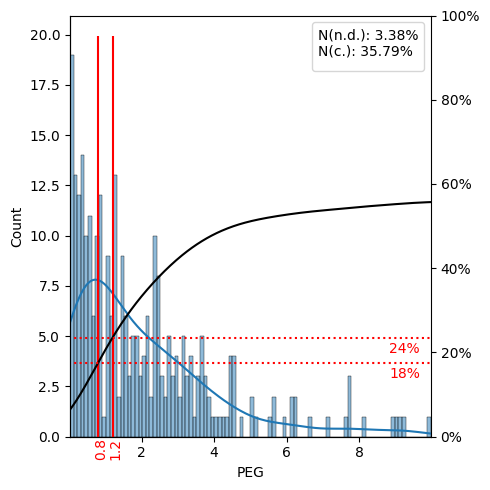

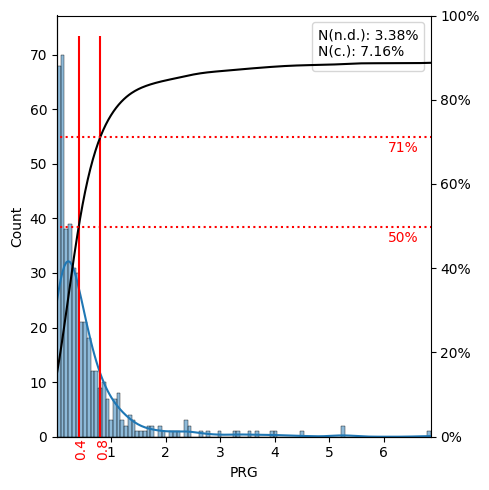

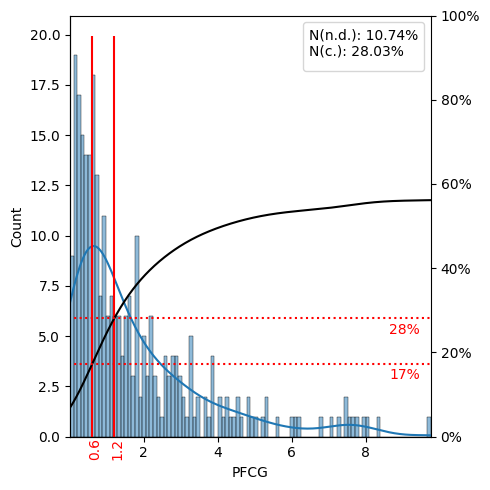

In [48]:
from stockMarket.ranking.rankingPlotter import RankingPlotter

ranking_plotter = RankingPlotter(ranking)
ranking_plotter.plot(peg_ranker, "peg.png", (0, 10))
ranking_plotter.plot(prg_ranker, "prg.png", (0, 10))
ranking_plotter.plot(pfcg_ranker, "peg.png", (0, 10))

### Write Email

In [47]:
from stockMarket.utils import write_email

emails = ["benjaminlantschner@gmail.com", "97gamjak@gmail.com"]
subject = "Stock Market Ranking"
body = ""
attachment = ["ranking_contracts.csv", "prg.png", "pcfg.png"]
write_email(emails, subject, body, attachment)